<a href="https://colab.research.google.com/github/Natassiam/testes_software_js/blob/main/Exerc%C3%ADcio_Datasets_e_Corpus_PLN_Nat%C3%A1ssia_Medeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluna: Natássia Rafaelle Medeiros Siqueira 24200953

Importação de bibliotecas


In [ ]:
import nltk
from nltk.corpus import stopwords, floresta
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import matplotlib.pyplot as plt


#Exercício 1

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=2ba2a7989210086c6d5409313325501b47063d40cce17b1add0b6c5568093956
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
import wikipedia
import re
from collections import Counter

def obter_texto(titulo):
    wikipedia.set_lang("pt")
    return wikipedia.page(titulo).content

def preprocessar(texto):
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = texto.lower()
    return texto

def tokenizar(texto):
    return texto.split()

def analisar_frequencias(tokens):
    contagem = Counter(tokens)
    types = set(tokens)
    return contagem, len(types)

def mostrar_resultados(contagem, total_types):
    print("Top 10 tokens mais comuns:")
    for token, freq in contagem.most_common(10):
        print(f"{token}: {freq}")
    print(f"\nNúmero total de types (palavras únicas): {total_types}")

# ----- Execução -----

if __name__ == "__main__":
    titulo_pagina = "Inteligência artificial"
    texto = obter_texto(titulo_pagina)
    texto_limpo = preprocessar(texto)
    tokens = tokenizar(texto_limpo)
    contagem, total_types = analisar_frequencias(tokens)
    mostrar_resultados(contagem, total_types)


Top 10 tokens mais comuns:
de: 389
a: 224
e: 197
o: 167
que: 153
em: 114
da: 111
inteligência: 94
ia: 88
um: 79

Número total de types (palavras únicas): 1956


#Exercício 2


In [ ]:
pip install nltk


Tags mais comuns no corpus MacMorpho:
N: 236462 ocorrências
ART: 151891 ocorrências
NPROP: 114318 ocorrências
PREP: 104364 ocorrências
V: 98056 ocorrências
PREP|+: 78274 ocorrências
,: 68494 ocorrências
ADJ: 53372 ocorrências
ADV: 30653 ocorrências
KC: 28262 ocorrências
PCP: 23092 ocorrências
": 21069 ocorrências
PROADJ: 20919 ocorrências
NUM: 18110 ocorrências
VAUX: 17832 ocorrências


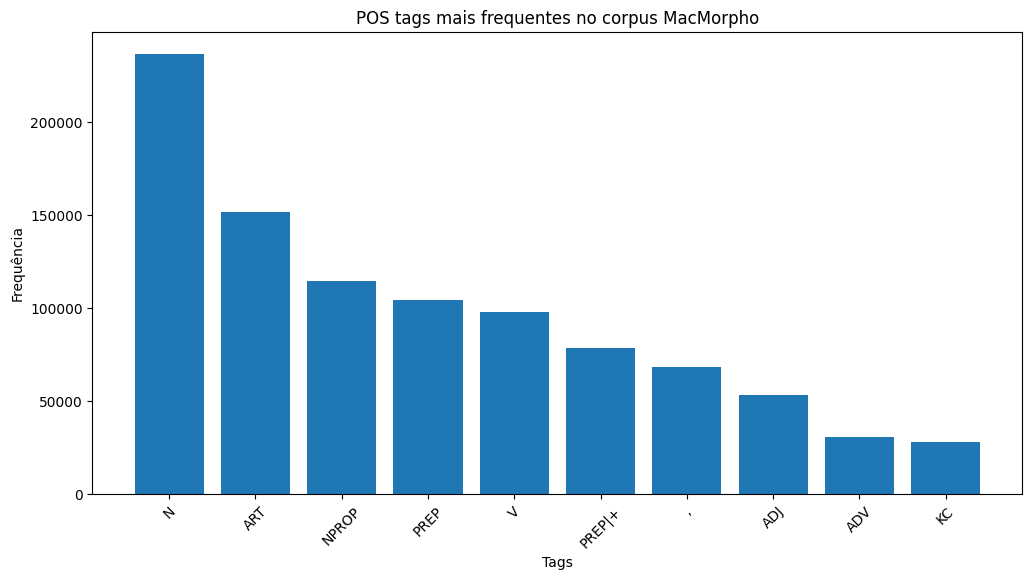

In [ ]:
nltk.download('punkt')
nltk.download('machado')
nltk.download('mac_morpho')

def portuguese_pos_tag(tokens):
    from nltk.corpus import mac_morpho
    tagged_sents = mac_morpho.tagged_sents()
    unigram_tagger = nltk.UnigramTagger(tagged_sents)
    return unigram_tagger.tag(tokens)

try:
    from nltk.corpus import machado
    print("Arquivos disponíveis no corpus Machado:")
    print(machado.CorpusView())


    sents = machado.sents()
    texto = " ".join([" ".join(sent) for sent in sents])
    tokens = word_tokenize(texto, language='portuguese')
    tags = portuguese_pos_tag(tokens)


    frequencia_tags = Counter(tag for _, tag in tags)


    print("\nTags mais comuns em Machado de Assis:")
    for tag, count in frequencia_tags.most_common(15):
        print(f"{tag}: {count} ocorrências")

    plt.figure(figsize=(12, 6))
    tags, counts = zip(*frequencia_tags.most_common(10))
    plt.bar(tags, counts)
    plt.title("POS tags mais frequentes em Machado de Assis")
    plt.xlabel("Tags")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.show()

except Exception as e:
    print(f"Erro ao processar corpus Machado: {e}")
    print("Usando corpus MacMorpho como alternativa...")

    from nltk.corpus import mac_morpho
    tagged_sents = mac_morpho.tagged_sents()
    tags = [tag for sent in tagged_sents for (word, tag) in sent]
    frequencia_tags = Counter(tags)

    print("\nTags mais comuns no corpus MacMorpho:")
    for tag, count in frequencia_tags.most_common(15):
        print(f"{tag}: {count} ocorrências")

    # Gráfico
    plt.figure(figsize=(12, 6))
    tags, counts = zip(*frequencia_tags.most_common(10))
    plt.bar(tags, counts)
    plt.title("POS tags mais frequentes no corpus MacMorpho")
    plt.xlabel("Tags")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.show()

# Exercício 3

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Total de tokens únicos: 21736

Top 10 tokens mais frequentes no corpus Floresta:
sobre: 349 ocorrências
ainda: 302 ocorrências
anos: 301 ocorrências
ontem: 296 ocorrências
segundo: 256 ocorrências
ter: 249 ocorrências
dois: 231 ocorrências
presidente: 218 ocorrências
disse: 213 ocorrências
governo: 206 ocorrências


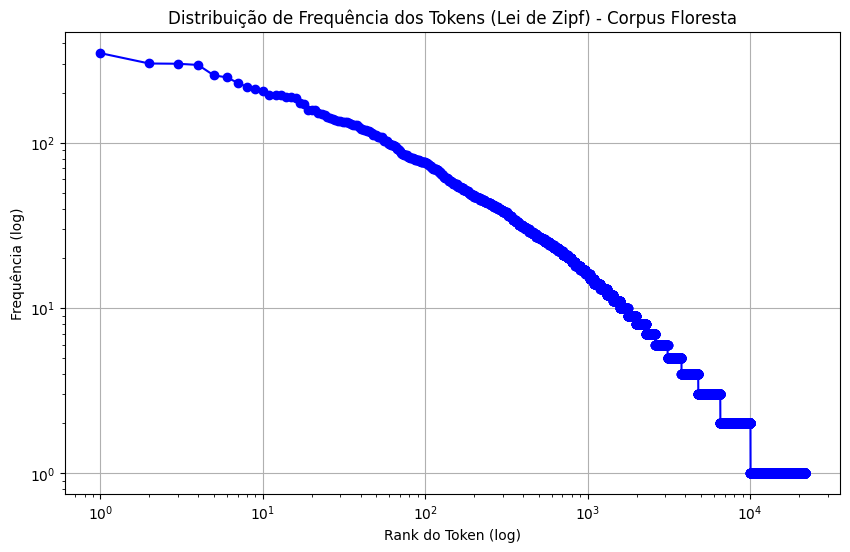

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('floresta')
nltk.download('punkt_tab')

def preprocessar_texto(texto):
    """Pré-processa o texto: tokeniza, remove pontuação e stopwords, converte para minúsculas"""

    try:
        tokens = word_tokenize(texto, language='portuguese')
    except:

        tokens = word_tokenize(texto)


    tokens = [token.lower() for token in tokens if token not in string.punctuation]

    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]  # Mantém apenas palavras

    return tokens

def plotar_distribuicao_frequencia(frequencias):
    """Plota a distribuição de frequência dos tokens"""
    ranks = range(1, len(frequencias) + 1)
    valores = list(frequencias.values())

    plt.figure(figsize=(10, 6))
    plt.plot(ranks, valores, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Distribuição de Frequência dos Tokens (Lei de Zipf) - Corpus Floresta')
    plt.xlabel('Rank do Token (log)')
    plt.ylabel('Frequência (log)')
    plt.grid(True)
    plt.show()


sentencas = floresta.sents()
texto_floresta = ' '.join([' '.join([word.split('_')[0] for word in sentenca]) for sentenca in sentencas])


tokens = preprocessar_texto(texto_floresta)
frequencias = Counter(tokens)

frequencias_ordenadas = dict(sorted(frequencias.items(), key=lambda item: item[1], reverse=True))


print(f"Total de tokens únicos: {len(frequencias_ordenadas)}")
print("\nTop 10 tokens mais frequentes no corpus Floresta:")
for token, freq in list(frequencias_ordenadas.items())[:10]:
    print(f"{token}: {freq} ocorrências")

plotar_distribuicao_frequencia(frequencias_ordenadas)

O gráfico segue a Lei de Zipf, apresentando:

Relação inversa entre rank e frequência (quanto maior o rank, menor a frequência).

Linearidade em escala log-log, especialmente para os ranks mais altos.

Poucos outliers, explicáveis pelas características do corpus (textos jornalísticos anotados).